# Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) 
is a **regularization technique** similar to Ridge Regression, 
but it uses **L1 regularization** instead of L2.

## 🎯 Intuition

In **Linear Regression**, we minimize the cost function:

J = ∑ (yi ​−yi​^​)2

In **Lasso Regression**, we add a **penalty term** based on the *absolute values* of coefficients:

J = ∑ (yi​−yi​^​)2 + λ ∑ ∣ βj ​∣

Where:
- λ = Regularization parameter (controls strength)
- ∣ βj ​∣ = Absolute value of coefficients

✅ The goal is to keep coefficients **small**, and in some cases, **exactly zero**!


## 🔍 Difference from Ridge Regression

| Feature | Ridge (L2) | Lasso (L1) |
|----------|-------------|-------------|
| Penalty term | L2 (squares of coefficients) | L1 (absolute values) |
| Coefficient shrinkage | Smoothly shrinks all coefficients | Can shrink some coefficients to 0 |
| Feature selection | ❌ No | ✅ Yes |
| Ideal for | Preventing overfitting | Feature selection & sparsity |

💡 Lasso = Ridge + Feature Selection Power


In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso

In [2]:
# Generate Data
np.random.seed(42)
X = np.random.randn(100, 5)
y = 3*X[:,0] + 2*X[:,1] + np.random.randn(100)  # Only first 2 features matter

In [3]:
# ⚙️ Linear Regression (No regularization)
linear_reg = LinearRegression()
linear_reg.fit(X, y)

# 🧮 Lasso Regression
lasso_reg = Lasso(alpha=0.1)   # α = λ
lasso_reg.fit(X, y)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [4]:
# 🔍 Compare Coefficients
print("Linear Regression Coefficients:", np.round(linear_reg.coef_, 3))
print("Lasso Regression Coefficients:", np.round(lasso_reg.coef_, 3))

Linear Regression Coefficients: [ 3.054  2.136 -0.021  0.161 -0.007]
Lasso Regression Coefficients: [ 2.894  2.009  0.     0.04  -0.   ]


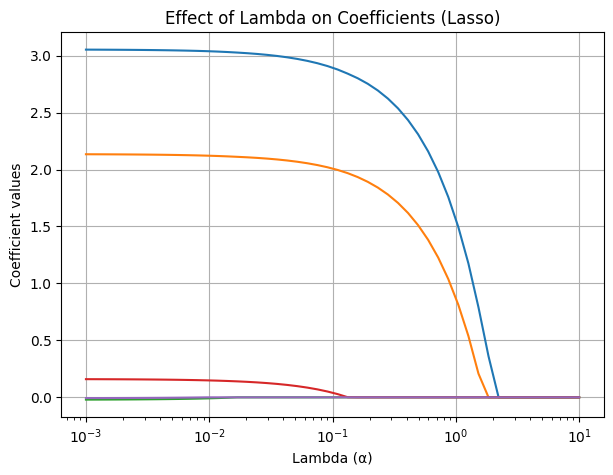

In [5]:
# 🧭 Effect of Lambda (α) on Coefficients
alphas = np.logspace(-3, 1, 50)
coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(7,5))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel("Lambda (α)")
plt.ylabel("Coefficient values")
plt.title("Effect of Lambda on Coefficients (Lasso)")
plt.grid(True)
plt.show()

## 🧠 Intuition behind L1 Regularization

- The L1 penalty (sum of absolute values) forms a **diamond-shaped constraint region**.  
- When this diamond touches the cost function contours, 
  it often happens at a **corner**, where some coefficients = 0.  
- Hence, Lasso tends to produce **sparse models** (some weights exactly zero).

This property is what gives Lasso its **feature selection ability**.


## ⚙️ When to Use Lasso Regression

✅ Use when:
- You have **many features**, and suspect that only some are useful  
- You want **automatic feature selection**  
- You need a **simpler, interpretable model**

⚠️ Don’t use when:
- All features are important but correlated → Use **Ridge Regression**

---

## 🧮 Formula Summary

| Model | Cost Function |
|--------|----------------|
| Linear Regression | J = ∑ (yi​−yi​^​)2 |
| Ridge Regression | J = ∑ (yi​−yi​^​)2 + λ ∑ (βj)^2 |
| Lasso Regression | J = ∑ (yi​−yi​^​)2 + λ ∑ ∣ βj ​∣ |


## 🧠 In Simple Words

- **Ridge** shrinks coefficients smoothly but keeps all features.  
- **Lasso** shrinks some coefficients all the way to **zero** — 
  effectively removing them from the model.  

Lasso = Linear Regression + Feature Selection Power 🔥
